Brallam Santiago Morales Garcia <br>
1233491047 <br>
Bogota, Colombia <br>
20 febrero de 2021 <br>

# Descripción de la actividad <br>

Para la actividad 2 se debe realizar las siguientes tareas: <br>
    
* Crear una variable Binaria con respecto a la 
columna SalePrice, en donde 1 sea SalePrice mayor a 214000.000000
y 0 SalePrice Menor a 214000.000000.

* Una vez creada esta variable, se debe generar un modelo supervisado
que me pronostique el comportamiento de esta variable binaria. Utilizando las
demas columnas del data set.

Es importante que en este modelo no se utilice las variables (Id, SalePrice)

* Los resultados a mostrar seran la importancia de las variables
y las metricas de la matriz de confusion.

* Se debe mostrar en un repositorio publico en github 
en un jupyter notebook.

El Dataset para el ejercicio es el siguiente:
Se recomienda usar el dataset con las variables transformadas 
y data limpia ( pues esta fue la primera actividad).

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

# Introducción

Si bien la construcción de los modelos de machine learning permiten llegar a conclusiones que generan valor e impactan los procesos de toma de decisiones en las organizaciones es indudable que requieren de todo un proceso, como ya se ha visto es necesario el entendimiento de los datos y aplicar transformaciones a los mimosos de modo que se pueda trabajar con los datos lo más limpios posible para posteriormente empezar a aplicar los respectivos algoritmos entorno a ciencia de datos, este último paso es el que se verá en el desarrollo  de este documento y que por supuesto estará apoyado de las técnicas previamente vistas en el curso.

In [94]:
#Se importan las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
#Habilitar para ver todas las filas y columnas

#pd.options.display.max_rows = None
#pd.options.display.max_columns = None

#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)

In [96]:
#Se importan el datase de trabajo

df = pd.read_csv("C:/Users/Santiago/Downloads/20141578047/MachineLearningEntregables/ACTIVIDAD 2/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [97]:
#Ver las columnas que contiene el data set

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [98]:
#Ver cuantos valores nulos hay por columna
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Limpieza de los datos

Una vez revisados los datos y sacadas algunas conclusiones la limpieza estará dada a partir de las columnas que contiene valores nulos, por ellos la estrategia será armar un nuevo dataset omitiendo las columnas que tienen muchos registros en nulos o donde la columna se de tipo Object ya que al ser categórica no se pueden utilizar alguna función como máximo, mínimo o promedio para imputar el dato faltante. <br>

Finalmente para las columnas donde no hace falta muchos registros y que no son tipo Object estos se imputarán mediante un promedio. De este modo las columnas que se omitirán del nuevo dataset son: MiscFeature, Fence, PoolQC, GarageCond, GarageQual, FireplaceQu, GarageType, GarageFinish, Electrical, BsmtFinType1, BsmtFinType2, BsmtExposure, BsmtCond, BsmtQual, MasVnrType, Alley; y las columnas imputadas serán LotFrontage, MasVnrArea, GarageYrBlt.

In [99]:
#Eliminar las columnas - Tambien se elimina el ID por no ser importante para el analisis
df = df.drop(columns=['MiscFeature', 'Fence', 'PoolQC', 'GarageCond', 'GarageQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
              'Electrical', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Alley'])

In [100]:
#Reemplazar valor nan

df['LotFrontage'] = df['LotFrontage'].fillna((df['LotFrontage'].mean()))
df['MasVnrArea'] = df['MasVnrArea'].fillna((df['MasVnrArea'].mean()))
df['GarageYrBlt'] = df['GarageYrBlt'].fillna((df['GarageYrBlt'].mean()))

In [101]:
#Verificar que no hay valores nulos
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
PavedDrive  

In [102]:
#Generar nueva columna  binaria  a partir de la variable SalePrice donde mayor a 214000.000000 = 1, menor 214000.000000 = 0.

df['SalesPriceBinary'] = np.where(df['SalePrice'] >= 214000.000000, 1, 0)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalesPriceBinary
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2003.0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,1976.0,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2001.0,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,1998.0,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,2000.0,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,1999.0,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,1978.0,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1941.0,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,1
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1950.0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125,0


In [103]:
#Eliminar las variables Id y SalesPrice del dataset (no requeridas en el modelo)

df = df.drop(columns=['Id', 'SalePrice'])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPriceBinary
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2003.0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,1976.0,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2001.0,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,1998.0,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,2000.0,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,1999.0,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,1978.0,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1941.0,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,1
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1950.0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,0


In [104]:
#Obtener variables numericas en datasets como entrada de los modelos

df = df.select_dtypes(include='number')
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalesPriceBinary
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,1
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,0


# Aplicando Modelos

En la siguiente sección se muestra la aplicación de los modelos vistos en clase (árbol de decisión, Random forest y Gradient Boosting) y el análisis de las métricas a partir de los resultados obtenidos en la matriz de confusión para cada uno de estos modelos. Para esto se definen primeramente los conjuntos de datos de entrada para los modelo y posteriormente el cálculo de los mismos.

0    1093
1     367
Name: SalesPriceBinary, dtype: int64

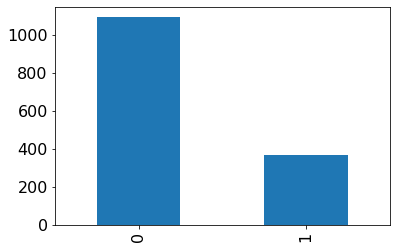

In [105]:
#Sets de datos

y_train = df['SalesPriceBinary']
x_train = df.iloc[:, 0:len(df.columns)-1]

df['SalesPriceBinary'].value_counts().sort_index().plot.bar()
df['SalesPriceBinary'].value_counts()


## Árbol de decisión

In [106]:
#Se utiliza la class balanced para balancear implicitamente los datos

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt

decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=80,
                                            min_samples_leaf=40,
                                            max_depth = 5,
                                            class_weight='balanced')
tree = decision_tree.fit(x_train, y_train)

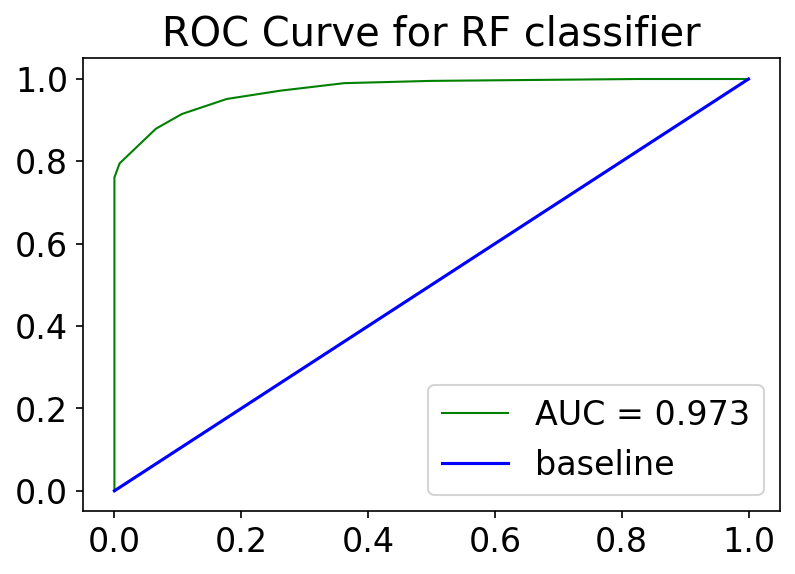

In [107]:
from sklearn.metrics import roc_curve, auc

probas = tree.predict_proba(x_train)

fpr, tpr, thresholds = roc_curve(y_train, probas[:,0], pos_label=0)
base_fpr, base_tpr, _ = roc_curve(y_train, [1 for _ in range(len(y_train))])

roc_auc = auc(fpr, tpr)

plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.rcParams['font.size'] = 16

plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();

In [108]:
cm_ad = confusion_matrix(y_train, tree.predict(x_train))
cm_ad

array([[961, 132],
       [ 24, 343]], dtype=int64)

In [109]:
#Metricas de Gradient Boosting

#Accuracy
Accuracy = (cm_ad[0][0] + cm_ad[1][1]) / ((cm_ad[0][0] + cm_ad[0][1] + cm_ad[1][0] + cm_ad[1][1]))

#Especificidad
Especificidad = (cm_ad[0][0]) / (cm_ad[0][0] + cm_ad[0][1])

#Sensitividad
Sensitividad = (cm_ad[1][1]) / (cm_ad[1][0] + cm_ad[1][1])

#Valor predicitivo positivo (Recall)
if (cm_ad[1][1] == 0):
    V_predict_pos = 0.0
else:
    V_predict_pos = (cm_ad[1][1]) / (cm_ad[1][1] + cm_ad[0][1]) 

#Valor predicitivo Negativo (Presicion)
if (cm_ad[0][0] == 0):
    V_predic_neg = 0.0
else:
    V_predic_neg = cm_ad[0][0] / (cm_ad[0][0] + cm_ad[1][0])
    
print('Accuracy ', Accuracy)
print('Especificidad ', Especificidad)
print('Sensitividad ',Sensitividad)
print('Valor predicitivo positivo - Recall ',V_predict_pos)
print('Valor predicitivo Negativo - Presicion ',V_predic_neg)

Accuracy  0.8931506849315068
Especificidad  0.879231473010064
Sensitividad  0.9346049046321526
Valor predicitivo positivo - Recall  0.7221052631578947
Valor predicitivo Negativo - Presicion  0.9756345177664975


## Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
y_train = df['SalesPriceBinary']
x_train = df.iloc[:, 0:len(df.columns)-1]

In [112]:
Random_F = RandomForestClassifier(n_estimators = 100, max_depth=0.5, random_state=0)
Random_Fit = Random_F.fit(x_train, y_train)

In [113]:
cm_ad = confusion_matrix(y_train, Random_Fit.predict(x_train))
cm_ad

array([[1093,    0],
       [ 367,    0]], dtype=int64)

In [115]:
#Metricas de Gradient Boosting

#Accuracy
Accuracy = (cm_ad[0][0] + cm_ad[1][1]) / ((cm_ad[0][0] + cm_ad[0][1] + cm_ad[1][0] + cm_ad[1][1]))

#Especificidad
Especificidad = (cm_ad[0][0]) / (cm_ad[0][0] + cm_ad[0][1])

#Sensitividad
Sensitividad = (cm_ad[1][1]) / (cm_ad[1][0] + cm_ad[1][1])

#Valor predicitivo positivo (Recall)
if (cm_ad[1][1] == 0):
    V_predict_pos = 0.0
else:
    V_predict_pos = (cm_ad[1][1]) / (cm_ad[1][1] + cm_ad[0][1]) 

#Valor predicitivo Negativo (Presicion)
if (cm_ad[0][0] == 0):
    V_predic_neg = 0.0
else:
    V_predic_neg = cm_ad[0][0] / (cm_ad[0][0] + cm_ad[1][0])
    
print('Accuracy ', Accuracy)
print('Especificidad ', Especificidad)
print('Sensitividad ',Sensitividad)
print('Valor predicitivo positivo - Recall ',V_predict_pos)
print('Valor predicitivo Negativo - Presicion ',V_predic_neg)

Accuracy  0.7486301369863013
Especificidad  1.0
Sensitividad  0.0
Valor predicitivo positivo - Recall  0.0
Valor predicitivo Negativo - Presicion  0.7486301369863013


## Gradient Boosting

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0).fit(x_train, y_train)

In [117]:
clf.score(x_train, y_train)

0.9849315068493151

In [118]:
cm_ad = confusion_matrix(y_train, clf.predict(x_train))
cm_ad

array([[1086,    7],
       [  15,  352]], dtype=int64)

In [121]:
#Metricas de Gradient Boosting

#Accuracy
Accuracy = (cm_ad[0][0] + cm_ad[1][1]) / ((cm_ad[0][0] + cm_ad[0][1] + cm_ad[1][0] + cm_ad[1][1]))

#Especificidad
Especificidad = (cm_ad[0][0]) / (cm_ad[0][0] + cm_ad[0][1])

#Sensitividad
Sensitividad = (cm_ad[1][1]) / (cm_ad[1][0] + cm_ad[1][1])

#Valor predicitivo positivo (Recall)
if (cm_ad[1][1] == 0):
    V_predict_pos = 0.0
else:
    V_predict_pos = (cm_ad[1][1]) / (cm_ad[1][1] + cm_ad[0][1]) 

#Valor predicitivo Negativo (Presicion)
if (cm_ad[0][0] == 0):
    V_predic_neg = 0.0
else:
    V_predic_neg = cm_ad[0][0] / (cm_ad[0][0] + cm_ad[1][0])
    
print('Accuracy ', Accuracy)
print('Especificidad ', Especificidad)
print('Sensitividad ',Sensitividad)
print('Valor predicitivo positivo - Recall ',V_predict_pos)
print('Valor predicitivo Negativo - Presicion ',V_predic_neg)

Accuracy  0.9849315068493151
Especificidad  0.9935956084172004
Sensitividad  0.9591280653950953
Valor predicitivo positivo - Recall  0.9805013927576601
Valor predicitivo Negativo - Presicion  0.9863760217983651


Feature: 0, Score: 0.00379
Feature: 1, Score: 0.00209
Feature: 2, Score: 0.01989
Feature: 3, Score: 0.63701
Feature: 4, Score: 0.00207
Feature: 5, Score: 0.01529
Feature: 6, Score: 0.01129
Feature: 7, Score: 0.00016
Feature: 8, Score: 0.02043
Feature: 9, Score: 0.00375
Feature: 10, Score: 0.00743
Feature: 11, Score: 0.06120
Feature: 12, Score: 0.00095
Feature: 13, Score: 0.00795
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.17713
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00022
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00122
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00583
Feature: 23, Score: 0.00133
Feature: 24, Score: 0.00200
Feature: 25, Score: 0.00046
Feature: 26, Score: 0.00495
Feature: 27, Score: 0.00074
Feature: 28, Score: 0.00070
Feature: 29, Score: 0.00170
Feature: 30, Score: 0.00230
Feature: 31, Score: 0.00209
Feature: 32, Score: 0.00452
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00016
Feature: 35, Score: 0.00134


<BarContainer object of 36 artists>

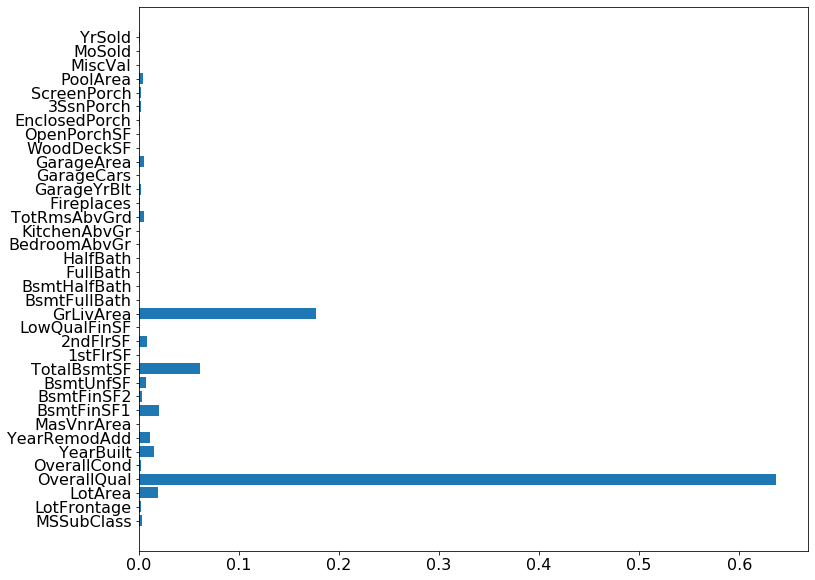

In [135]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.subplots(figsize=(12,10))
plt.barh(x_train.columns, clf.feature_importances_)

# Conclusiones <br>

Revisando las métricas arrojadas por los tres modelos que se vieron en clase, se evidencia que los modelos de árboles de decisión y de random forest arrojan los mejores resultados y  entre estos dos el que mejor resultado arroja es el de random forest con métricas por encima del 95%, del mismo modo, el modelo de árboles de decisión arrojo métricas aceptables aunque no equiparables con random forest, estas por encima del 70% aproximadamente. <br>
    
En contraparte claramente se ha descartado el modelo de Gradient boosting dado que aunque la métrica de accuracy era de 89% las demás no superaban siquiera el 0.1 % (Sensibilidad y Recall) y por ende el modelo no se considera muy bueno.

Tener una balanceo implicito en el primer modelo ayuda a tener resultados mas realista y que no se encuentren sobrecargados o con tendencia hacia la clase.
